<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 130.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
# Identificar y eliminar filas duplicadas
df = df.drop_duplicates()


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [6]:
# Contar valores perdidos en la columna 'CodingActivities'
missing_coding_activities = df['CodingActivities'].isnull().sum()

# Mostrar el resultado
print(f"Número de valores perdidos en 'CodingActivities': {missing_coding_activities}")


Número de valores perdidos en 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [7]:
# Imputar valores perdidos en 'CodingActivities' con forward-fill
df['CodingActivities'].fillna(method='ffill', inplace=True)


/tmp/ipykernel_541/2881620513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_541/2881620513.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


In [8]:
# Imputar valores perdidos en 'ConvertedCompYearly' con la mediana
median_comp = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


/tmp/ipykernel_541/2906293121.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
# Seleccionar solo las columnas de compensación relevantes
comp_columns = ['ConvertedCompYearly', 'CompTotal']

# Mostrar estadísticas descriptivas de esas columnas
for col in comp_columns:
    print(f"\nDistribución de la columna '{col}':")
    print(df[col].describe())




Distribución de la columna 'ConvertedCompYearly':
count    6.543700e+04
mean     7.257636e+04
std      1.122207e+05
min      1.000000e+00
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Distribución de la columna 'CompTotal':
count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [11]:
# Aplicar Min-Max Scaling a 'ConvertedCompYearly'
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()

df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [12]:
# Calcular la media y desviación estándar
mean_val = df['ConvertedCompYearly'].mean()
std_val = df['ConvertedCompYearly'].std()

# Aplicar Z-score normalization
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_val) / std_val


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


/tmp/ipykernel_541/931228523.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_541/931228523.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_541/931228523.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace m

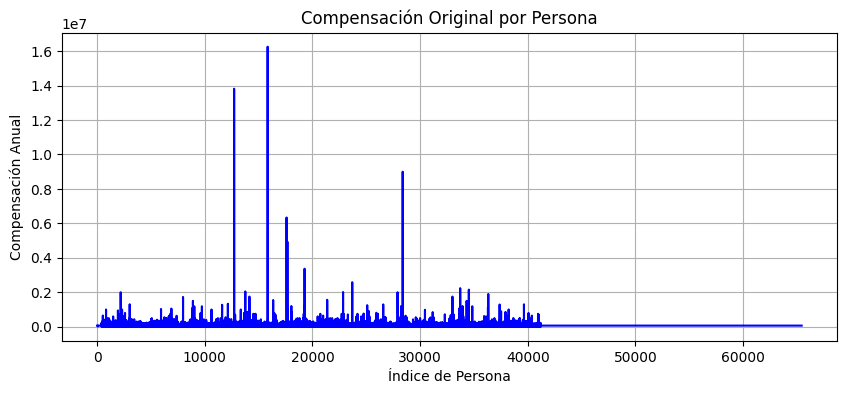

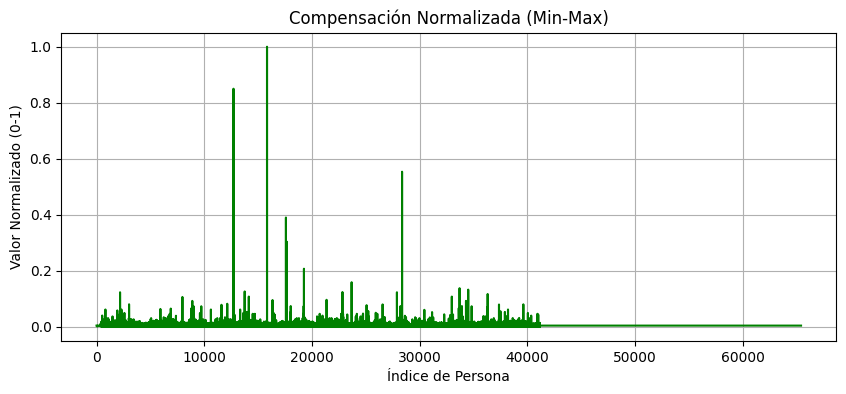

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Paso 2: Eliminar duplicados
df = df.drop_duplicates()

# Paso 3: Imputar valores perdidos en 'CodingActivities' con forward-fill
df['CodingActivities'].fillna(method='ffill', inplace=True)

# Paso 4: Imputar valores perdidos en 'ConvertedCompYearly' con la mediana
median_comp = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_comp, inplace=True)

# Paso 5: Normalización Min-Max
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)

# Paso 6: Normalización Z-score
mean_val = df['ConvertedCompYearly'].mean()
std_val = df['ConvertedCompYearly'].std()
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_val) / std_val

# Paso 7: Visualización individual por persona

# Gráfico 1: Original
plt.figure(figsize=(10, 4))
plt.plot(df['ConvertedCompYearly'].dropna().reset_index(drop=True), color='blue')
plt.title('Compensación Original por Persona')
plt.xlabel('Índice de Persona')
plt.ylabel('Compensación Anual')
plt.grid(True)
plt.show()

# Gráfico 2: Min-Max
plt.figure(figsize=(10, 4))
plt.plot(df['ConvertedCompYearly_MinMax'].dropna().reset_index(drop=True), color='green')
plt.title('Compensación Normalizada (Min-Max)')
plt.xlabel('Índice de Persona')
plt.ylabel('Valor Normalizado (0-1)')
plt.grid(True)
plt.show()




In [26]:
# Imputar valores faltantes con la mediana
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

# Calcular media y desviación estándar
mean_val = df['ConvertedCompYearly'].mean()
std_val = df['ConvertedCompYearly'].std()

# Calcular Z-score
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_val) / std_val

# Mostrar los primeros valores y resumen estadístico
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head(10))
print("\nResumen estadístico del Z-score:")
print(df['ConvertedCompYearly_Zscore'].describe())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0              65000.0                   -0.067513
1              65000.0                   -0.067513
2              65000.0                   -0.067513
3              65000.0                   -0.067513
4              65000.0                   -0.067513
5              65000.0                   -0.067513
6              65000.0                   -0.067513
7              65000.0                   -0.067513
8              65000.0                   -0.067513
9              65000.0                   -0.067513

Resumen estadístico del Z-score:
count    6.543700e+04
mean    -5.212044e-17
std      1.000000e+00
min     -6.467200e-01
25%     -6.751303e-02
50%     -6.751303e-02
75%     -6.751303e-02
max      1.442161e+02
Name: ConvertedCompYearly_Zscore, dtype: float64


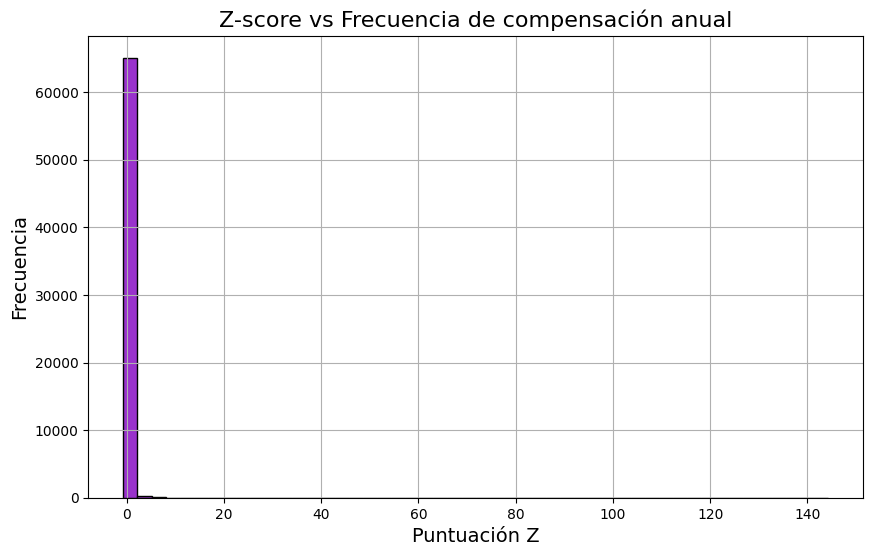

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Imputar valores faltantes con la mediana
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

# Calcular media y desviación estándar
mean_val = df['ConvertedCompYearly'].mean()
std_val = df['ConvertedCompYearly'].std()

# Calcular Z-score
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_val) / std_val

# Graficar Z-score vs frecuencia
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly_Zscore'], bins=50, color='darkorchid', edgecolor='black')

# Títulos y etiquetas
plt.title('Z-score vs Frecuencia de compensación anual', fontsize=16)
plt.xlabel('Puntuación Z', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True)

# Mostrar gráfico
plt.show()



In [15]:
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore']].describe())


       ConvertedCompYearly  ConvertedCompYearly_MinMax  \
count         6.543700e+04                65437.000000   
mean          7.257636e+04                    0.004464   
std           1.122207e+05                    0.006903   
min           1.000000e+00                    0.000000   
25%           6.500000e+04                    0.003998   
50%           6.500000e+04                    0.003998   
75%           6.500000e+04                    0.003998   
max           1.625660e+07                    1.000000   

       ConvertedCompYearly_Zscore  
count                6.543700e+04  
mean                -5.212044e-17  
std                  1.000000e+00  
min                 -6.467200e-01  
25%                 -6.751303e-02  
50%                 -6.751303e-02  
75%                 -6.751303e-02  
max                  1.442161e+02  


In [18]:
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore']].describe())


       ConvertedCompYearly  ConvertedCompYearly_MinMax  \
count         6.543700e+04                65437.000000   
mean          7.257636e+04                    0.004464   
std           1.122207e+05                    0.006903   
min           1.000000e+00                    0.000000   
25%           6.500000e+04                    0.003998   
50%           6.500000e+04                    0.003998   
75%           6.500000e+04                    0.003998   
max           1.625660e+07                    1.000000   

       ConvertedCompYearly_Zscore  
count                6.543700e+04  
mean                -5.212044e-17  
std                  1.000000e+00  
min                 -6.467200e-01  
25%                 -6.751303e-02  
50%                 -6.751303e-02  
75%                 -6.751303e-02  
max                  1.442161e+02  


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
